In [6]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'FReD-2024-11-29_cleaned.csv'
data = pd.read_csv(file_path)

# Filter the dataset to include only "Failure" and "Success"
filtered_data = data[data['result'].isin(['Failure', 'Success'])]

# Encode the target variable
label_encoder = LabelEncoder()
filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])

# Define features and target variable
X_filtered = filtered_data.drop(columns=['result', 'result_encoded'])
y_filtered = filtered_data['result_encoded']

# Split the data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train the logistic regression model
model_f = LogisticRegression(max_iter=500, random_state=42)
model_f.fit(X_train_f, y_train_f)

# Make predictions
y_pred_f = model_f.predict(X_test_f)

# Evaluate the model
accuracy_f = accuracy_score(y_test_f, y_pred_f)
report_f = classification_report(y_test_f, y_pred_f, target_names=label_encoder.classes_[:2])

# Output the results
print(f"Accuracy: {accuracy_f}\n")
print("Classification Report:")
print(report_f)


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

     Failure       0.71      0.75      0.73        36
     Success       0.79      0.75      0.77        44

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



<ipython-input-13-6c39fca80c49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'FReD-2024-11-29_cleaned.csv'
data = pd.read_csv(file_path)

# Filter the dataset to include only "Failure" and "Success"
filtered_data = data[data['result'].isin(['Failure', 'Success'])]

# Encode the target variable
label_encoder = LabelEncoder()
filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])

# Define features and target variable
X_filtered = filtered_data.drop(columns=['result', 'result_encoded'])
y_filtered = filtered_data['result_encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.2, random_state=42)

# Train logistic regression models with L1 and L2 regularization
l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=500, random_state=42)
l2_model = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=500, random_state=42)

# Fit the models
l1_model.fit(X_train, y_train)
l2_model.fit(X_train, y_train)

# Evaluate the L1 model
y_pred_l1 = l1_model.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
report_l1 = classification_report(y_test, y_pred_l1, target_names=label_encoder.classes_[:2])

# Evaluate the L2 model
y_pred_l2 = l2_model.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
report_l2 = classification_report(y_test, y_pred_l2, target_names=label_encoder.classes_[:2])

# Output the results
print("L1 Regularization Model:")
print(f"Accuracy: {accuracy_l1}\n")
print("Classification Report:")
print(report_l1)

print("L2 Regularization Model:")
print(f"Accuracy: {accuracy_l2}\n")
print("Classification Report:")
print(report_l2)


L1 Regularization Model:
Accuracy: 0.7125

Classification Report:
              precision    recall  f1-score   support

     Failure       0.69      0.67      0.68        36
     Success       0.73      0.75      0.74        44

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80

L2 Regularization Model:
Accuracy: 0.7125

Classification Report:
              precision    recall  f1-score   support

     Failure       0.69      0.67      0.68        36
     Success       0.73      0.75      0.74        44

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



<ipython-input-14-9f6b380ad3c7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])


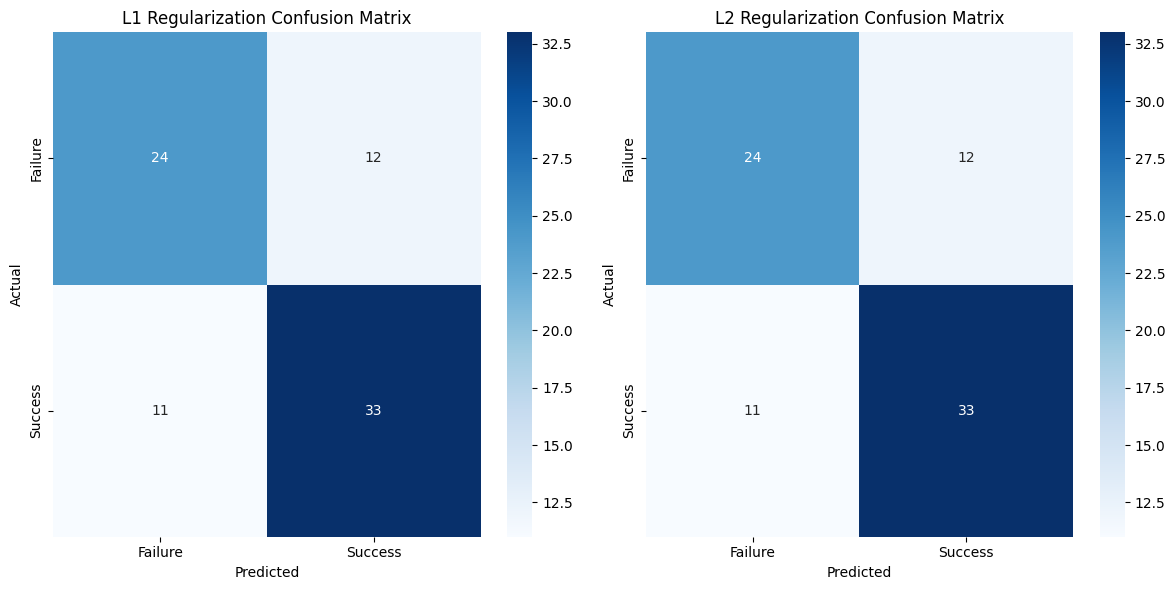

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Plot confusion matrices for L1 and L2 models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for L1 model
cm_l1 = confusion_matrix(y_test, y_pred_l1)
sns.heatmap(cm_l1, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=label_encoder.classes_[:2], yticklabels=label_encoder.classes_[:2])
axes[0].set_title('L1 Regularization Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for L2 model
cm_l2 = confusion_matrix(y_test, y_pred_l2)
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=label_encoder.classes_[:2], yticklabels=label_encoder.classes_[:2])
axes[1].set_title('L2 Regularization Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()